In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url1 = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/expanded_1.csv'
url2 = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/expanded_2.csv'
url3 = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/expanded_3.csv'
url4 = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/expanded_4.csv'
url_school_level = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/ALL_YEARS_ADDED_FEATURES.csv'

expanded_df = pd.read_csv(url1)
expanded_df = expanded_df.append(pd.read_csv(url2), ignore_index=True)
expanded_df = expanded_df.append(pd.read_csv(url3), ignore_index=True)
expanded_df = expanded_df.append(pd.read_csv(url4), ignore_index=True)
school_level_df = pd.read_csv(url_school_level).drop('Unnamed: 0', axis=1)
expanded_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
expanded_df.head()

,SCHOOL_YEAR,GENDER,FEDERAL_RACE_CODE,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,COHORT_CNT,per_capita_income,median_houshold_income,median_family_income,STRatio,MathProficiency,ReadingProficiency,dropped_out
0,2007.0,0.0,3.0,1.0,0.0,0.0,3.0,22766.0,0.0,49727.0,14.0,74.0,77.0,1.0
1,2007.0,0.0,3.0,1.0,0.0,0.0,3.0,22766.0,0.0,49727.0,14.0,74.0,77.0,1.0
2,2007.0,0.0,3.0,1.0,0.0,0.0,3.0,22766.0,0.0,49727.0,14.0,74.0,77.0,1.0
3,2007.0,0.0,3.0,1.0,1.0,0.0,7.0,22766.0,0.0,49727.0,14.0,74.0,77.0,0.0
4,2007.0,0.0,3.0,1.0,1.0,0.0,7.0,22766.0,0.0,49727.0,14.0,74.0,77.0,0.0


In [6]:
school_level_df.head()

,SCHOOL_YEAR,DIV_NAME,SCH_NAME,GENDER,FEDERAL_RACE_CODE,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE,per_capita_income,median_household_income,median_family_income,StudentNumber,STRatio,MathProficiency,ReadingProficiency
0,2007-2008,Accomack County,Arcadia High,F,3.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
1,2007-2008,Accomack County,Arcadia High,F,3.0,Y,Y,N,7,100.000000,0.000000,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
2,2007-2008,Accomack County,Arcadia High,F,5.0,N,N,N,33,75.757576,9.090909,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
3,2007-2008,Accomack County,Arcadia High,F,5.0,N,Y,N,13,46.153846,46.153846,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
4,2007-2008,Accomack County,Arcadia High,F,5.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0


In [7]:
from sklearn.model_selection import train_test_split
X = np.array(school_level_df.drop('DROPOUT_RATE', axis=1))
y = np.array(school_level_df['DROPOUT_RATE'])
XTR, XTE, yTR, yTE = train_test_split(X, y, test_size=0.1)
XTR.shape, XTE.shape

((64863, 17), (7208, 17))

In [8]:
school_level_df.columns

Index(['SCHOOL_YEAR', 'DIV_NAME', 'SCH_NAME', 'GENDER', 'FEDERAL_RACE_CODE',
       'DISABILITY_FLAG', 'DISADVANTAGED_FLAG', 'LEP_FLAG', 'COHORT_CNT',
       'DIPLOMA_RATE', 'DROPOUT_RATE', 'per_capita_income',
       'median_household_income', 'median_family_income', 'StudentNumber',
       'STRatio', 'MathProficiency', 'ReadingProficiency'],
      dtype='object')

In [9]:
expanded_df.columns

Index(['SCHOOL_YEAR', 'GENDER', 'FEDERAL_RACE_CODE', 'DISABILITY_FLAG',
       'DISADVANTAGED_FLAG', 'LEP_FLAG', 'COHORT_CNT', 'per_capita_income',
       'median_houshold_income', 'median_family_income', 'STRatio',
       'MathProficiency', 'ReadingProficiency', 'dropped_out'],
      dtype='object')

In [23]:
train_length, test_length

(963658, 106485)

In [54]:
import time
t0, t1 = time.time(), time.time()
# expand the training data
cohort_ix = 8
school_year_ix = 0
gender_ix = 3
race_ix = 4
flag_ixs = [5, 6, 7]
exact_ixs = [8, 10, 11, 12, 14, 15, 16]
rowlength = 13 # number of features carrying over

# the order of the features will be:
# (1) Year
# (2) Gender
# (3-5) Disability / Disadvantaged / LEP flags
# (6) Cohort Size
# (7) Federal Race Code
# (8-10) Per-capita / Median-household / Median-family incomes
# (11) Student-Teacher Ratio
# (12-13) Math / Reading Proficiency scores
train_length = sum(XTR[:, cohort_ix])
X_train, y_train = np.zeros(shape=(train_length,rowlength)), np.zeros(train_length)
i = 0
for j in range(len(XTR)):
    row = XTR[j]
    dropout_rate = yTR[j]
    for k in range(row[cohort_ix]):
    
        if i % int(0.1*train_length) == 0:
            t2 = time.time()
            print('%i percent done (last step took %.1f seconds)' %(i/int(0.1*train_length)*0.1*100, t2-t1))
            t1 = time.time()
        
        # e.g., the first 2 students of a 10 person cohort with 20% dropout have "True"
        if row[cohort_ix]*dropout_rate > k:   dropped_out = True
        else:                                 dropped_out = False
        y_train[i] = int(dropped_out)

        X_train[i, 0] = int(row[school_year_ix][:4])
        X_train[i, 1] = int(row[gender_ix] == 'M')
        for new_ix, old_ix in zip(range(2,5), flag_ixs):
            X_train[i, new_ix] = int(row[old_ix] == 'Y')
        X_train[i, 5] = row[race_ix]
        for new_ix, old_ix in zip(range(6, 13), exact_ixs):
            X_train[i, new_ix] = row[old_ix]
        i += 1
X_train[:,0] -= 2007 # bring these all down

0 percent done (last step took 0.1 seconds)
10 percent done (last step took 0.9 seconds)
20 percent done (last step took 0.9 seconds)
30 percent done (last step took 0.9 seconds)
40 percent done (last step took 0.9 seconds)
50 percent done (last step took 0.9 seconds)
60 percent done (last step took 0.9 seconds)
70 percent done (last step took 0.9 seconds)
80 percent done (last step took 0.9 seconds)
90 percent done (last step took 0.9 seconds)
100 percent done (last step took 0.9 seconds)


In [60]:
X_test = np.zeros(shape=(len(yTE), rowlength))
y_test = yTE
for i in range(len(X_test)):
    row = XTE[i]
    X_test[i, 0] = int(row[school_year_ix][:4])
    X_test[i, 1] = int(row[gender_ix] == 'M')
    for new_ix, old_ix in zip(range(2,5), flag_ixs):
        X_test[i, new_ix] = int(row[old_ix] == 'Y')
    X_test[i, 5] = row[race_ix]
    for new_ix, old_ix in zip(range(6, 13), exact_ixs):
        X_test[i, new_ix] = row[old_ix]
X_test[:,0] -= 2007 # bring these all down

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
xform = ColumnTransformer([
    ('scaling', StandardScaler(), slice(6, 13)),
    ('onehot race code', OneHotEncoder(), [5]),
    ('do nothing', 'passthrough', slice(0, 5))
])

X_train_scaled = xform.fit_transform(X_train)
X_test_scaled = xform.transform(X_test)

In [56]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation='relu', input_shape=[len(X_train_scaled[0])]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               10000     
_________________________________________________________________
batch_normalization_3 (Batch (None, 500)               2000      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [57]:
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [59]:
# this takes like 40 minutes on my laptop
# it also starts to get lower validation accuracy after 3 epochs, so maybe this is bad
history = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

Train on 770926 samples, validate on 192732 samples
Epoch 1/5
770926/770926 [==============================] - 466s 605us/sample - loss: 0.4580 - accuracy: 0.7722 - val_loss: 0.5338 - val_accuracy: 0.7480
Epoch 2/5
770926/770926 [==============================] - 463s 601us/sample - loss: 0.4009 - accuracy: 0.8047 - val_loss: 0.5896 - val_accuracy: 0.7498
Epoch 3/5
770926/770926 [==============================] - 473s 613us/sample - loss: 0.3704 - accuracy: 0.8214 - val_loss: 0.7807 - val_accuracy: 0.7500
Epoch 4/5
770926/770926 [==============================] - 468s 607us/sample - loss: 0.3487 - accuracy: 0.8330 - val_loss: 0.8762 - val_accuracy: 0.7467
Epoch 5/5
770926/770926 [==============================] - 471s 611us/sample - loss: 0.3337 - accuracy: 0.8416 - val_loss: 1.0189 - val_accuracy: 0.7363


In [66]:
X_test_scaled.shape, y_test.shape

((7208, 19), (7208,))

In [73]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict_proba(X_test_scaled)[:, 1]*100 # pick the dropout rate, scaled to a %
error = np.sqrt(mean_squared_error(y_test, y_pred))
print('Error: %.3f' %error)

Error: 48.515


In [70]:
y_pred[:5]

array([0.09752418, 0.3938928 , 0.06266056, 0.1340412 , 0.28224662],
      dtype=float32)

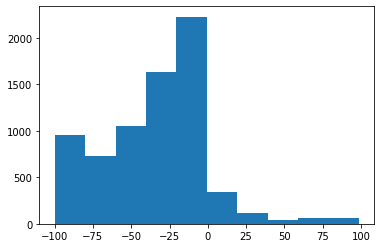

In [74]:
plt.hist(y_test - y_pred)
plt.show()

In [78]:
min(y_test-y_pred)

-100.0

In [65]:
sum(y_train)/len(y_train)

0.6402281722353781